<a href="https://colab.research.google.com/github/karthik19-cloud/GenAI-Training/blob/main/02_result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# ============================================
# 🤖 Employee Attrition Prediction using KNN
# ============================================

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# =====================
# 1️⃣ Load the Dataset
# =====================
# If the CSV file is inside sample_data folder:
df = pd.read_csv('/content/sample_data/employee_attrition.csv')

print("✅ Dataset Loaded Successfully:")
print(df.head())

✅ Dataset Loaded Successfully:
   Age                JobRole  MonthlyIncome  JobSatisfaction  YearsAtCompany  \
0   29        Sales Executive           4800                3               4   
1   35     Research Scientist           6000                4               8   
2   40  Laboratory Technician           3400                2               6   
3   28        Sales Executive           4300                3               3   
4   45                Manager          11000                4              15   

   Attrition  
0          1  
1          0  
2          0  
3          1  
4          0  


In [5]:
# ===========================
# 2️⃣ Preprocess the Data
# ===========================
# Handle extra spaces in column names (if any)
df.columns = df.columns.str.strip()

# Encode categorical feature (JobRole)
label_encoder = LabelEncoder()
df['JobRole'] = label_encoder.fit_transform(df['JobRole'])

# Separate features and target
X = df[['Age', 'JobRole', 'MonthlyIncome', 'JobSatisfaction', 'YearsAtCompany']]
y = df['Attrition']

# Scale features for KNN (important for distance-based algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [6]:
# ===========================
# 3️⃣ Build and Train the Model
# ===========================
knn = KNeighborsClassifier(n_neighbors=3)  # You can tune this value
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
# ===========================
# 4️⃣ Make Predictions
# ===========================
y_pred = knn.predict(X_test)


📊 Model Evaluation Metrics:
Accuracy: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



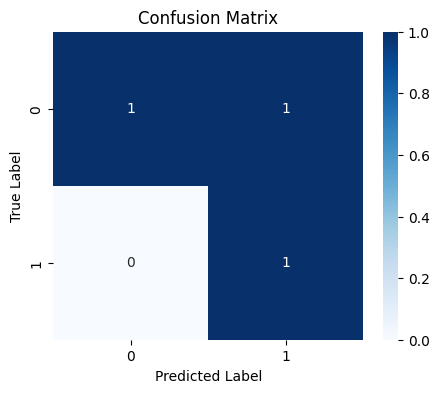

In [8]:
# ===========================
# 5️⃣ Evaluate the Model
# ===========================
print("\n📊 Model Evaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [9]:
# ===========================
# 6️⃣ Predict New Employee Attrition
# ===========================
# Example: Predict attrition for a new employee
new_employee = pd.DataFrame({
    'Age': [32],
    'JobRole': ['Research Scientist'],
    'MonthlyIncome': [5200],
    'JobSatisfaction': [3],
    'YearsAtCompany': [4]
})

# Encode and scale the new data
new_employee['JobRole'] = label_encoder.transform(new_employee['JobRole'])
new_employee_scaled = scaler.transform(new_employee)

# Predict
prediction = knn.predict(new_employee_scaled)
print(f"\n🔮 Predicted Attrition for new employee: {int(prediction[0])} (1 = Leave, 0 = Stay)")


🔮 Predicted Attrition for new employee: 1 (1 = Leave, 0 = Stay)
